# Example notebook to read and visualize both datasets

## Preliminary step
Download the fix_att folder from Google Drive into the local directory: https://drive.google.com/drive/folders/1Z-GEwl_e2XlJwsMhK6aUhNubcuYs0aRd?usp=sharing. The resulting folder with preprocessed data from both datasets files will be in the format:
- data
    - VR (~60 GB)
        - Subject_#-Session_#
            - s_ms (where s = seconds of motor action onset, ms = milliseconds percision)
                - avg_trial_data.p (pickle file containing premotor averaged variable, data_dict)
    - dreyeve
        - run_#
            - frame# (frame number, in the original study frames, corresponding to the motor action onset)
                - avg_trial_data.p (pickle file containing premotor averaged variable, data_dict)

## Load directories

In [1]:
import os
import configparser
import sys

# Get the parent directory path
parent_directory = os.path.dirname(os.path.abspath('__file__'))

# Construct the path to the config.ini file in the parent directory
config_file_path = os.path.join(parent_directory, '..', 'config.ini')

# Load the configuration file
config = configparser.ConfigParser()
config.read(config_file_path)

# Access configuration parameters
vr_data_path = config['paths']['vr_data_path']
dreyeve_data_path = config['paths']['dreyeve_data_path']
parent_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..'))
sys.path.append(parent_dir)

## Load sample file into dataloader

In [2]:
import pickle 
from training.utils import get_loaders, plot_sample_image

dataset_type = 'vr' # vr or dreyeve

if dataset_type == 'dreyeve':
    test_sample = f'{dreyeve_data_path}/participant_72/frame3264/avg_trial_data.p'
else:
    test_sample = f'{vr_data_path}/Sbj_19-Ssn_3/3581_011114/avg_trial_data.p'

# select which dataset to view as an example
data_dict = pickle.load(open(test_sample, "rb"))
print(data_dict.keys())

dict_keys(['eye_smoothed', 'opt_mag_avg', 'opt_ang_avg', 'orig_frame', 'save_trial_info', 'raw_et'])


In [6]:
train_loader, valid_loader, test_loader, train_data, valid_data, test_data = get_loaders([test_sample], [test_sample], [test_sample])

## Plots

### Original frame

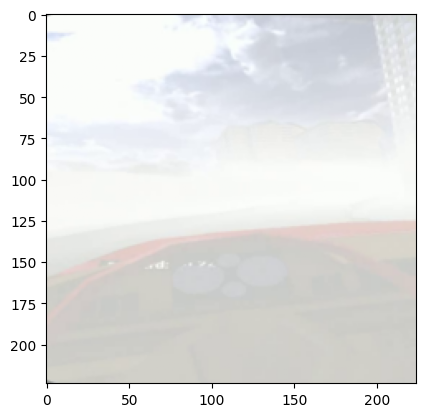

In [7]:
plot_sample_image(0, 'orig_frame', test_data)

### Fixation heatmap

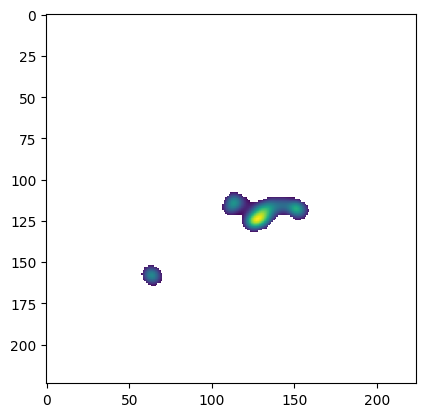

In [8]:
plot_sample_image(0, 'fixation_heatmap', test_data)

### Peripheral mask used on original frame

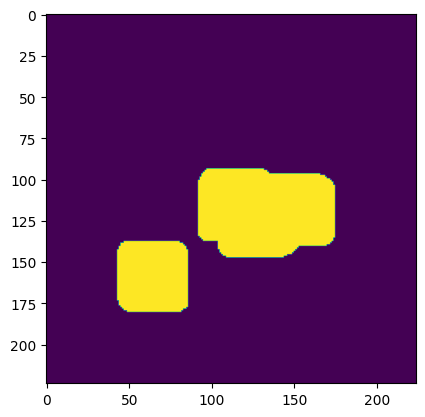

In [9]:
plot_sample_image(0, 'peripheral_mask', test_data)

### Peripheral mask used as ViT input

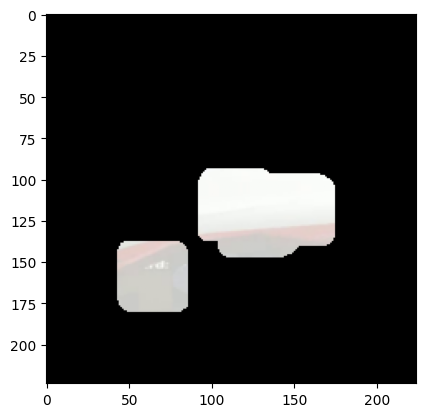

In [10]:
plot_sample_image(0, 'peripheral', test_data)

### Random peripheral mask applied to original frame, used as ViT input

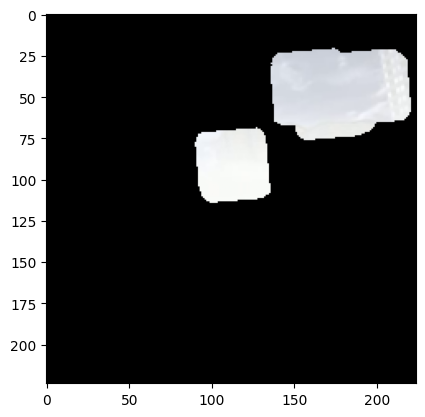

In [11]:
plot_sample_image(0, 'random_peripheral', test_data)